In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [ ]:
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Ruta de las carpetas para train, val y test
base_path = './datasets/matriculas-españolas'
sets = ['train', 'val', 'test']

# Asignar ID de clase para la etiqueta "matricula"
class_id = 0  # Se supone que todas son de clase matricula

# Función para dibujar el rectángulo en la imagen
def draw_rectangle_yolo(image, label_path):
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if int(parts[0]) == class_id:
                x_center, y_center, width, height = map(float, parts[1:])
                
                # Calcular coordenadas absolutas del bounding box
                img_width, img_height = image.size
                x_center *= img_width
                y_center *= img_height
                width *= img_width
                height *= img_height
                
                x_min = int(x_center - width / 2)
                y_min = int(y_center - height / 2)
                x_max = int(x_center + width / 2)
                y_max = int(y_center + height / 2)

                # Dibujar el rectángulo
                draw = ImageDraw.Draw(image)
                draw.rectangle([x_min, y_min, x_max, y_max], outline='red', width=3)

# Leer y procesar las imágenes y etiquetas en cada subcarpeta
for set_type in sets:
    images_path = os.path.join(base_path, set_type, 'images')
    labels_path = os.path.join(base_path, set_type, 'labels')
    
    for image_file in os.listdir(images_path):
        if image_file.endswith('.jpg') or image_file.endswith('.png'):
            image_path = os.path.join(images_path, image_file)
            label_file = os.path.splitext(image_file)[0] + '.txt'
            label_path = os.path.join(labels_path, label_file)
            
            if not os.path.exists(label_path):
                print(f"Etiqueta no encontrada para {image_file}")
                continue
            
            # Cargar la imagen
            image = Image.open(image_path)
            
            # Dibujar los bounding boxes
            draw_rectangle_yolo(image, label_path)
            
            # Mostrar la imagen con el bounding box
            plt.figure(figsize=(8, 6))
            plt.imshow(image)
            plt.title(f"{set_type.capitalize()} - {image_file}")
            plt.axis('off')
            plt.show()


In [2]:

from ultralytics.models.yolo.detect import DetectionTrainer
import torch
from ultralytics import YOLO

# Verifica si se puede usar una GPU
print("GPU disponible: ", torch.cuda.is_available())

# Parámetros de entrenamiento para el modelo
args = dict(
    model="yolo11n.pt",  # Modelo YOLO preentrenado
    data="matriculas.yaml",  # Archivo de configuración de datos
    epochs=150,  # Aumentar el número de épocas
    batch=32,  # Tamaño del lote ajustado
    multi_scale=True,  # Habilita escalado múltiple para variar el tamaño de imagen
    workers=4,  # Número de trabajadores para el DataLoader
    device="cuda" if torch.cuda.is_available() else "cpu",  # Usar GPU si está disponible, de lo contrario CPU
    verbose=True,  # Mostrar progreso de entrenamiento
    lr0=0.0001,  # Tasa de aprendizaje inicial ajustada
    weight_decay=0.0001,  # Regularización L2
    single_cls=True,  # Entrenar solo una clase
    patience=25,  # Early stopping después de 20épocas sin mejora
    augment=True,  # Habilitar aumento de datos
    plots=True,  # Mostrar gráficos de pérdida
)

# Inicializa el entrenador y entrena el modelo
trainer = DetectionTrainer(overrides=args)  
# Add other necessary configurations here
trainer.train()

GPU disponible:  True
Ultralytics 8.3.23  Python-3.10.15 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=matriculas.yaml, epochs=150, time=None, patience=25, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=4, project=None, name=train32, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

train: Scanning C:\Users\elena\VC\P4\datasets\matriculas-españolas\train\labels.cache... 201 images, 2 backgrounds, 0 corrupt: 100%|██████████| 203/203 [00:00<?, ?it/s]
val: Scanning C:\Users\elena\VC\P4\datasets\matriculas-españolas\val\labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<?, ?it/s]


Plotting labels to runs\detect\train32\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs\detect\train32
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      8.64G      1.735      4.591      1.535         21        704: 100%|██████████| 7/7 [00:15<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         58         58   0.000115     0.0345   5.96e-05   2.06e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      9.14G      1.124      3.705      1.064         17        448: 100%|██████████| 7/7 [00:12<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         58         58    0.00333          1      0.859      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      9.23G      1.224      2.827      1.076         23        928: 100%|██████████| 7/7 [00:11<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all         58         58    0.00333          1      0.756      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150         7G      1.155      2.021      1.035         17        864: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         58         58    0.00333          1     0.0703     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      11.9G      1.125      2.025      1.037         19        512: 100%|██████████| 7/7 [00:12<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         58         58    0.00333          1    0.00722    0.00408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      7.76G      1.027      1.931      1.029         21        864: 100%|██████████| 7/7 [00:14<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all         58         58    0.00333          1    0.00589    0.00385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150        10G       1.16      1.876      1.014         23        800: 100%|██████████| 7/7 [00:12<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         58         58    0.00132      0.397   0.000962   0.000318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      8.54G      1.039       1.53     0.9539         20        544: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         58         58   0.000517      0.155     0.0353     0.0246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150       7.9G      1.132      1.574      1.016         24        640: 100%|██████████| 7/7 [00:08<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         58         58    0.00138      0.414     0.0849     0.0607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150       9.4G      1.061      1.513     0.9825         20        416: 100%|██████████| 7/7 [00:10<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         58         58      0.732     0.0479      0.289      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      10.3G     0.9581      1.584     0.9977         20        896: 100%|██████████| 7/7 [00:18<00:00,  2.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all         58         58          1       0.16        0.6      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      9.35G      0.951      1.383     0.9643         22        896: 100%|██████████| 7/7 [00:09<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         58         58          1      0.554      0.905      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      4.21G      1.034      1.264     0.9691         20        928: 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         58         58      0.962      0.879      0.966       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      6.83G      1.088      1.155     0.9534         19        352: 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         58         58      0.883      0.783      0.914      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      7.81G      1.081      1.265      1.006         17        544: 100%|██████████| 7/7 [00:11<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         58         58      0.947      0.828      0.919      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150       8.8G       1.03      1.224      1.001         17        800: 100%|██████████| 7/7 [00:16<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         58         58       0.94      0.897      0.942      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      9.66G      1.054      1.203      1.003         20        800: 100%|██████████| 7/7 [00:18<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]

                   all         58         58      0.982      0.946      0.991      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150        11G     0.9588      1.069     0.9589         20        576: 100%|██████████| 7/7 [00:15<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         58         58      0.944      0.966       0.99       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      6.46G      1.022      1.005      0.976         27        352: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         58         58      0.947      0.927      0.951      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      11.1G     0.9935      1.083     0.9838         23        864: 100%|██████████| 7/7 [00:12<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         58         58      0.988      0.948      0.984       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      11.6G      1.069      1.088      1.017         15        928: 100%|██████████| 7/7 [00:15<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         58         58      0.809      0.966      0.942      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      8.41G      1.136     0.9808     0.9921         17        352: 100%|██████████| 7/7 [00:10<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         58         58      0.978      0.983      0.979      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      8.97G      1.007     0.8982     0.9655         19        512: 100%|██████████| 7/7 [00:12<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all         58         58       0.87      0.923      0.948      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      10.2G      1.089      1.007     0.9986         17        576: 100%|██████████| 7/7 [00:12<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         58         58      0.964      0.983      0.971      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      9.89G     0.9567     0.9545     0.9717         24        736: 100%|██████████| 7/7 [00:12<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all         58         58      0.979      0.966      0.981      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      9.77G     0.9896     0.8718     0.9763         15        416: 100%|██████████| 7/7 [00:10<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         58         58      0.982      0.941      0.977      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      9.27G     0.9275     0.8746     0.9507         11        480: 100%|██████████| 7/7 [00:07<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         58         58      0.979      0.966      0.991      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      7.53G     0.9563     0.7821     0.9324         19        576: 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         58         58      0.972      0.983      0.995       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      9.06G     0.9676     0.8261       0.95         20        736: 100%|██████████| 7/7 [00:14<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]

                   all         58         58      0.983      0.995      0.994      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150        11G     0.8749     0.8289     0.9538         18        576: 100%|██████████| 7/7 [00:20<00:00,  2.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all         58         58       0.99      0.983      0.995       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      7.87G     0.9294       0.77     0.9187         22        352: 100%|██████████| 7/7 [00:08<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         58         58      0.934      0.983      0.973      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      7.75G     0.8815     0.7784     0.9342         15        928: 100%|██████████| 7/7 [00:13<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all         58         58      0.946      0.983      0.975      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      11.3G     0.8468     0.7623     0.9336         28        608: 100%|██████████| 7/7 [00:14<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         58         58      0.944      0.948      0.955      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      9.85G      0.869     0.7411     0.9358         22        512: 100%|██████████| 7/7 [00:11<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         58         58      0.917      0.983      0.945        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150        10G     0.8434     0.7622     0.9208         13        704: 100%|██████████| 7/7 [00:09<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         58         58      0.966      0.948      0.982      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      8.42G     0.8719     0.7003     0.9217         23        352: 100%|██████████| 7/7 [00:15<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         58         58      0.965          1      0.994       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      6.25G     0.8092     0.6701     0.9074         15        832: 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         58         58      0.996      0.983      0.995      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      11.2G     0.9404     0.7177     0.9311         12        640: 100%|██████████| 7/7 [00:14<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         58         58          1      0.965      0.993      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      8.43G       0.87     0.6734     0.9209         24        960: 100%|██████████| 7/7 [00:07<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         58         58      0.998      0.983      0.994      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      6.79G     0.8639     0.6865     0.9044         20        320: 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         58         58          1      0.995      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      9.75G     0.9433     0.7076     0.9188         24        512: 100%|██████████| 7/7 [00:08<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         58         58      0.945          1      0.993      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      11.7G     0.8891     0.6597     0.9301         13        480: 100%|██████████| 7/7 [00:16<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all         58         58      0.977          1      0.995      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      10.2G     0.9207     0.6763     0.9303         20        576: 100%|██████████| 7/7 [00:11<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         58         58      0.994          1      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      9.85G     0.7681     0.6198     0.9263         27        960: 100%|██████████| 7/7 [00:14<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]

                   all         58         58      0.997          1      0.995      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      9.68G     0.8781     0.6442     0.9111         18        352: 100%|██████████| 7/7 [00:14<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all         58         58      0.978      0.983      0.985      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      8.02G     0.8616       0.65     0.9332         17        896: 100%|██████████| 7/7 [00:09<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all         58         58      0.992      0.983      0.985        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      11.6G     0.8385     0.6353     0.9404         23        960: 100%|██████████| 7/7 [00:23<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all         58         58          1      0.977      0.985       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150       8.1G     0.7816      0.592     0.9201         14        896: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         58         58       0.99      0.983      0.994      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      4.72G      0.905     0.6776     0.9071         18        640: 100%|██████████| 7/7 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         58         58      0.966      0.981       0.99      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      9.21G     0.8503     0.6103     0.8929         21        576: 100%|██████████| 7/7 [00:07<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all         58         58      0.935      0.997      0.979      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      8.37G     0.7642     0.6005     0.9215         19        864: 100%|██████████| 7/7 [00:11<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         58         58      0.979      0.983      0.994      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      6.83G     0.7697     0.5948     0.8817         19        608: 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         58         58      0.998      0.983       0.99      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      7.38G     0.7486     0.5745     0.8858         19        608: 100%|██████████| 7/7 [00:08<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         58         58      0.999      0.983      0.994      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      8.21G     0.7453     0.5796     0.8853         17        640: 100%|██████████| 7/7 [00:09<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         58         58      0.966      0.983       0.99      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      6.96G     0.7532      0.542     0.8752         26        352: 100%|██████████| 7/7 [00:07<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         58         58      0.947      0.983      0.991      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      9.82G     0.7332      0.553     0.9108         22        704: 100%|██████████| 7/7 [00:11<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         58         58      0.995      0.983      0.993      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      9.68G     0.7936     0.5798     0.8801         20        352: 100%|██████████| 7/7 [00:11<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         58         58      0.979      0.983      0.994      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      8.07G     0.7559     0.6073     0.9167         20        608: 100%|██████████| 7/7 [00:08<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         58         58      0.985      0.983      0.994      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      10.2G     0.7329      0.563     0.8888         19        672: 100%|██████████| 7/7 [00:09<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         58         58      0.998      0.983      0.992      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      8.51G     0.7477     0.5508      0.909         23        672: 100%|██████████| 7/7 [00:08<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         58         58          1      0.982      0.994      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      7.34G     0.8139     0.5571     0.8768         23        416: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all         58         58          1      0.982      0.995      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      9.93G     0.7337     0.5334      0.881         20        512: 100%|██████████| 7/7 [00:12<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         58         58          1      0.982      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      8.97G     0.7229     0.5344     0.8847         25        672: 100%|██████████| 7/7 [00:15<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         58         58      0.996      0.983      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      10.2G      0.727     0.5228     0.8951         21        896: 100%|██████████| 7/7 [00:15<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all         58         58          1      0.983      0.994      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      9.93G      0.682     0.5035     0.8991         14        800: 100%|██████████| 7/7 [00:16<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all         58         58      0.998      0.983      0.994      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      10.1G     0.7412     0.5434     0.9015         26        320: 100%|██████████| 7/7 [00:19<00:00,  2.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         58         58      0.999          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      7.51G     0.6942     0.5136     0.8678         15        576: 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         58         58      0.996      0.983      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150         9G     0.7307     0.5227     0.8846         16        384: 100%|██████████| 7/7 [00:18<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

                   all         58         58      0.995      0.983      0.994      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      7.31G     0.7732     0.5367     0.8703         18        352: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         58         58      0.993      0.983      0.994      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      6.31G     0.6948     0.5221     0.8571         14        960: 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         58         58      0.998      0.983      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150       8.1G     0.6878     0.4961     0.8886         20        352: 100%|██████████| 7/7 [00:10<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         58         58          1          1      0.995      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      10.8G     0.6838     0.5243     0.8895         25        512: 100%|██████████| 7/7 [00:16<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         58         58      0.997      0.983      0.994      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      10.3G     0.6484     0.4869     0.8831         18        928: 100%|██████████| 7/7 [00:15<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         58         58      0.997      0.983      0.992      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150       8.4G     0.7773     0.5072     0.8785         18        832: 100%|██████████| 7/7 [00:11<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         58         58      0.998      0.983      0.988      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150       8.4G     0.7184      0.482     0.8748         25        608: 100%|██████████| 7/7 [00:14<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         58         58      0.997      0.983       0.99      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      9.91G     0.7292     0.4991     0.8721         15        448: 100%|██████████| 7/7 [00:07<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         58         58      0.996      0.983      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      6.77G     0.7195     0.4877     0.8595         20        736: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         58         58      0.999          1      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      9.51G     0.7182     0.5248     0.8885         22        736: 100%|██████████| 7/7 [00:10<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         58         58      0.998          1      0.995      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      9.05G      0.725     0.4935     0.8769         19        416: 100%|██████████| 7/7 [00:15<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all         58         58          1      0.998      0.995      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      9.57G     0.7385     0.5159     0.8637         16        448: 100%|██████████| 7/7 [00:15<00:00,  2.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         58         58          1       0.98      0.992      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      9.82G     0.6901     0.4736     0.8658         29        512: 100%|██████████| 7/7 [00:21<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all         58         58      0.998      0.966      0.993      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150       9.8G     0.6766     0.4714     0.8755         22        928: 100%|██████████| 7/7 [00:09<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         58         58          1      0.983      0.994      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150       9.8G     0.6801     0.5006     0.8846         23        448: 100%|██████████| 7/7 [00:21<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all         58         58          1      0.999      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      7.43G     0.6874     0.4807     0.8749         20        704: 100%|██████████| 7/7 [00:04<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         58         58      0.999          1      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      9.98G     0.6582     0.4505     0.8681         21        384: 100%|██████████| 7/7 [00:09<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         58         58          1      0.999      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      8.62G     0.6957     0.4677     0.8733         19        896: 100%|██████████| 7/7 [00:07<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         58         58      0.994      0.983      0.995      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150        11G     0.6383     0.4451     0.8544         23        832: 100%|██████████| 7/7 [00:17<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         58         58      0.982          1      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      7.64G     0.6817     0.4487     0.8672         23        896: 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         58         58      0.998      0.983      0.995       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      5.79G      0.673      0.454     0.8581         26        736: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         58         58      0.998      0.983      0.995      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      6.15G     0.6388     0.4266     0.8478         23        800: 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         58         58      0.997      0.983      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      6.02G     0.6419     0.4318     0.8486         22        672: 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         58         58      0.996      0.983      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      5.16G     0.6761      0.441     0.8541         25        672: 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         58         58      0.998      0.983      0.994      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      9.06G     0.6699     0.4437      0.866         19        416: 100%|██████████| 7/7 [00:09<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         58         58          1      0.998      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      9.22G      0.665     0.4602      0.843         17        448: 100%|██████████| 7/7 [00:07<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         58         58      0.983      0.998      0.995      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      8.06G     0.6472     0.4437     0.8565         29        448: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         58         58      0.983          1      0.994      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      6.91G     0.5895     0.4154     0.8487         21        608: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         58         58          1      0.999      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      10.4G     0.6293      0.421     0.8605         23        416: 100%|██████████| 7/7 [00:16<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all         58         58          1      0.999      0.995      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150        10G     0.6067      0.428     0.8595         23        448: 100%|██████████| 7/7 [00:14<00:00,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

                   all         58         58      0.999          1      0.995      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      7.49G     0.5767     0.4019     0.8503         27        608: 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         58         58          1      0.998      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      9.23G     0.6002     0.4255     0.8558         19        704: 100%|██████████| 7/7 [00:07<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         58         58          1      0.999      0.995      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      8.28G     0.6163     0.4352     0.8529         24        736: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         58         58      0.998      0.983      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      11.1G      0.602     0.4383     0.8501         20        384: 100%|██████████| 7/7 [00:17<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         58         58      0.992      0.983      0.995       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      10.2G     0.5834     0.4215     0.8652         24        352: 100%|██████████| 7/7 [00:15<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         58         58      0.983          1      0.995      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      8.19G     0.5612      0.416     0.8382         15        512: 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         58         58          1      0.997      0.995       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      7.17G     0.6184      0.414     0.8391         16        576: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         58         58      0.998          1      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      10.3G     0.5856     0.4167     0.8624         22        480: 100%|██████████| 7/7 [00:14<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all         58         58      0.995          1      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      7.63G     0.5599     0.3806     0.8445         25        832: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         58         58      0.997          1      0.995      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      10.3G     0.5802     0.3882     0.8633         19        800: 100%|██████████| 7/7 [00:13<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         58         58      0.997          1      0.995      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      9.15G     0.6233     0.4187     0.8508         19        320: 100%|██████████| 7/7 [00:08<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         58         58      0.996          1      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      9.78G     0.5607     0.3974     0.8474         21        928: 100%|██████████| 7/7 [00:13<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

                   all         58         58      0.996          1      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      7.59G     0.5743      0.397     0.8383         16        864: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         58         58      0.996          1      0.995      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150       9.8G     0.6149     0.4056     0.8498         21        352: 100%|██████████| 7/7 [00:09<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         58         58      0.998          1      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      9.92G       0.55     0.3864     0.8385         16        768: 100%|██████████| 7/7 [00:08<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         58         58      0.998          1      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      9.33G     0.5486     0.3816     0.8386         22        384: 100%|██████████| 7/7 [00:07<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         58         58      0.998          1      0.995      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      8.02G     0.5639      0.393     0.8353         20        416: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         58         58      0.998          1      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      7.27G     0.5438     0.3759     0.8304         24        608: 100%|██████████| 7/7 [00:08<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         58         58      0.996          1      0.995       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      11.8G     0.5269     0.3991     0.8569         25        864: 100%|██████████| 7/7 [00:16<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         58         58      0.996          1      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      9.86G     0.5651     0.3837     0.8519         18        608: 100%|██████████| 7/7 [00:13<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         58         58      0.994      0.983      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      11.7G      0.542      0.386     0.8319         23        416: 100%|██████████| 7/7 [00:10<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         58         58      0.991      0.983      0.994      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      8.77G     0.5483     0.3793     0.8318         18        864: 100%|██████████| 7/7 [00:07<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         58         58      0.994      0.983      0.995      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      9.86G     0.4957     0.3583     0.8506         16        800: 100%|██████████| 7/7 [00:11<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         58         58      0.979          1      0.995      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      11.2G      0.497     0.3633     0.8385         23        768: 100%|██████████| 7/7 [00:13<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         58         58      0.981          1      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      9.53G     0.5347     0.3812     0.8292         18        320: 100%|██████████| 7/7 [00:09<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         58         58      0.994          1      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      9.15G     0.5617      0.379     0.8424         22        384: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         58         58      0.997          1      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      9.18G     0.5995     0.3909      0.842         24        320: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all         58         58      0.997          1      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150        10G     0.5261       0.36      0.843         23        608: 100%|██████████| 7/7 [00:14<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         58         58      0.998          1      0.995      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      7.43G     0.5005     0.3542     0.8385         21        480: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         58         58      0.998          1      0.995      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150        10G     0.5104     0.3589     0.8321         16        448: 100%|██████████| 7/7 [00:10<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         58         58      0.999          1      0.995      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      7.26G     0.5184     0.3606      0.844         25        672: 100%|██████████| 7/7 [00:07<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         58         58      0.999          1      0.995      0.878
EarlyStopping: Training stopped early as no improvement observed in last 25 epochs. Best results observed at epoch 104, best model saved as best.pt.
To update EarlyStopping(patience=25) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



129 epochs completed in 0.432 hours.
Optimizer stripped from runs\detect\train32\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train32\weights\best.pt, 5.5MB

Validating runs\detect\train32\weights\best.pt...
Ultralytics 8.3.23  Python-3.10.15 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


                   all         58         58      0.998          1      0.995      0.872
Speed: 0.3ms preprocess, 9.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\train32


In [7]:
import os
import torch
import cv2
import easyocr
import csv
import logging
from ultralytics import YOLO

# Configura el logger para suprimir mensajes
logging.getLogger('ultralytics').setLevel(logging.WARNING)

# Verifica si se puede usar una GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("GPU disponible: ", torch.cuda.is_available())

# Configuración de OCR
reader = easyocr.Reader(['es'])

classNames = ["person", "bicycle", "car", "motorbike", "bus"]

# Cargar los modelos YOLO
model_general = YOLO('yolo11n.pt')  # Modelo para detectar personas y vehículos
model_plate = YOLO('runs/detect/train32/weights/best.pt')  # Modelo para detectar matrículas

# Configuración del archivo de video y CSV
filename = "C0142.MP4"
output_video_filename = "resultado_deteccion.mp4"
csv_filename = "resultados.csv"

# Inicializar el video y el escritor
cap = cv2.VideoCapture(filename)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width, height = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out_video = cv2.VideoWriter(output_video_filename, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

# Preparación del archivo CSV
with open(csv_filename, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['fotograma', 'tipo_objeto', 'confianza', 'identificador_tracking', 'x1', 'y1', 'x2', 'y2',
                         'matrícula_en_su_caso', 'texto_matricula'])

    # Variables de conteo y seguimiento de objetos únicos
    conteo_clases = {name: 0 for name in classNames}
    track_ids_contados = set()  # Set para almacenar track_ids únicos

    # Procesar el video con detección general
    results = model_general.track(source=filename, show=True, stream=True, verbose=False)
    frame_count = 0

    # Almacenar matrículas y sus IDs para el seguimiento con su confianza
    matrículas_seguimiento = {}

    # Iterar sobre cada resultado por frame
    for frame_result in results:
        frame_count += 1
        frame = frame_result.orig_img

        # Imprimir fotograma actual y total de fotogramas
        print(f'Procesando fotograma {frame_count}')

        # Obtener detecciones y agregar track_id de cada objeto
        for box in frame_result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            score = box.conf[0].item()
            label = int(box.cls[0])
            track_id = int(box.id[0]) if box.id is not None else -1

            if score >= 0.4:  # Umbral de confianza
                if 0 <= label < len(classNames):
                    label_name = classNames[label]

                    # Verificar si el objeto ya fue contado
                    if track_id not in track_ids_contados:
                        track_ids_contados.add(track_id)  # Añadir track_id al set para evitar conteo duplicado
                        conteo_clases[label_name] += 1  # Contar solo si es la primera vez que se ve el track_id

                    # Dibujar el rectángulo y mostrar el ID de seguimiento en el objeto
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
                    cv2.putText(frame, f'ID: {track_id}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
                    cv2.putText(frame, label_name, (x1, y1 - 25), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)

                    # Procesar solo si es un vehículo para buscar matrículas
                    if label_name in ["car", "bus", "motorbike"]: 
                        roi = frame[y1:y2, x1:x2]  # Región de interés (ROI) del vehículo

                        # Usar el modelo de matrículas para detectar matrículas en la ROI
                        plate_results = model_plate.predict(source=roi, show=False)  

                        # Procesar los resultados de detección de matrículas
                        for plate_result in plate_results:
                            for plate_box in plate_result.boxes:
                                plate_x1, plate_y1, plate_x2, plate_y2 = map(int, plate_box.xyxy[0])
                                plate_score = plate_box.conf[0].item()

                                if plate_score >= 0.3:  # Umbral de confianza para matrículas
                                    # Dibuja el rectángulo de la matrícula en el frame
                                    cv2.rectangle(frame, (plate_x1 + x1, plate_y1 + y1), (plate_x2 + x1, plate_y2 + y1), (0, 255, 0), 2)

                                    # Leer el texto de la matrícula con preprocesamiento
                                    roi_plate = roi[plate_y1:plate_y2, plate_x1:plate_x2]
                                    roi_plate = cv2.cvtColor(roi_plate, cv2.COLOR_BGR2GRAY)
                                    roi_plate = cv2.equalizeHist(roi_plate)
                                    roi_plate = cv2.adaptiveThreshold(roi_plate, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
                                    roi_plate = cv2.GaussianBlur(roi_plate, (3, 3), 0)

                                    # Aplicar OCR a la ROI de la matrícula
                                    ocr_results_plate = reader.readtext(roi_plate)
                                    if ocr_results_plate:
                                        matricula_texto = ocr_results_plate[0][-2]  # Texto detectado
                                        ocr_confianza = ocr_results_plate[0][-1]  # Confianza de la lectura

                                        # Almacenar solo la matrícula con mayor confianza
                                        if (track_id not in matrículas_seguimiento) or (ocr_confianza > matrículas_seguimiento[track_id][1]):
                                            matrículas_seguimiento[track_id] = (matricula_texto, ocr_confianza)
                                            print(f'Matrícula detectada en fotograma {frame_count}: {matricula_texto} con confianza {ocr_confianza}')

                                    # Obtener la matrícula de mayor confianza para el CSV
                                    texto_matricula = matrículas_seguimiento[track_id][0] if track_id in matrículas_seguimiento else "N/A"

                                    # Escribir en el archivo CSV
                                    csv_writer.writerow([frame_count, label_name, score, track_id, x1, y1, x2, y2,
                                                         "matrícula", texto_matricula])

                                    # Mostrar el texto de la matrícula en el video
                                    cv2.putText(frame, texto_matricula, (plate_x1 + x1, plate_y1 + y1 - 10), 
                                                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
                                    break
                        else:
                            csv_writer.writerow([frame_count, label_name, score, track_id, x1, y1, x2, y2, "N/A", "N/A"])
                    else:
                        csv_writer.writerow([frame_count, label_name, score, track_id, x1, y1, x2, y2, "N/A", "N/A"])

                    # Mostrar la matrícula correspondiente si ya fue detectada con el texto de mayor confianza
                    if track_id in matrículas_seguimiento:
                        cv2.putText(frame, matrículas_seguimiento[track_id][0], (x1, y1 - 40), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        # Guardar el frame procesado en el archivo de video
        out_video.write(frame)

# Liberar recursos
cap.release()
out_video.release()
cv2.destroyAllWindows()

# Mostrar conteo de clases
print("Conteo total de objetos:")
for clase, conteo in conteo_clases.items():
    print(f"{clase}: {conteo}")


GPU disponible:  True
Procesando fotograma 1
Procesando fotograma 2
Procesando fotograma 3
Procesando fotograma 4
Procesando fotograma 5
Procesando fotograma 6
Procesando fotograma 7
Procesando fotograma 8
Procesando fotograma 9
Procesando fotograma 10
Procesando fotograma 11
Procesando fotograma 12
Procesando fotograma 13
Procesando fotograma 14
Procesando fotograma 15
Procesando fotograma 16
Procesando fotograma 17
Procesando fotograma 18
Procesando fotograma 19
Procesando fotograma 20
Procesando fotograma 21
Procesando fotograma 22
Procesando fotograma 23
Procesando fotograma 24
Procesando fotograma 25
Procesando fotograma 26
Procesando fotograma 27
Procesando fotograma 28
Procesando fotograma 29
Procesando fotograma 30
Procesando fotograma 31
Procesando fotograma 32
Procesando fotograma 33
Procesando fotograma 34
Procesando fotograma 35
Procesando fotograma 36
Procesando fotograma 37
Procesando fotograma 38
Procesando fotograma 39
Procesando fotograma 40
Procesando fotograma 41
Pro

   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  16.3273         1.73477         4.59069         1.53452   
1      2  30.6906         1.12390         3.70477         1.06421   
2      3  44.3978         1.22406         2.82667         1.07593   
3      4  49.7975         1.15502         2.02121         1.03477   
4      5  63.2291         1.12518         2.02532         1.03671   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.00011            0.03448           0.00006   
1               0.00333            1.00000           0.85933   
2               0.00333            1.00000           0.75590   
3               0.00333            1.00000           0.07031   
4               0.00333            1.00000           0.00722   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.00002       1.25803       4.38688       1.55557  0.000120   
1              0.51223       0.88464       3

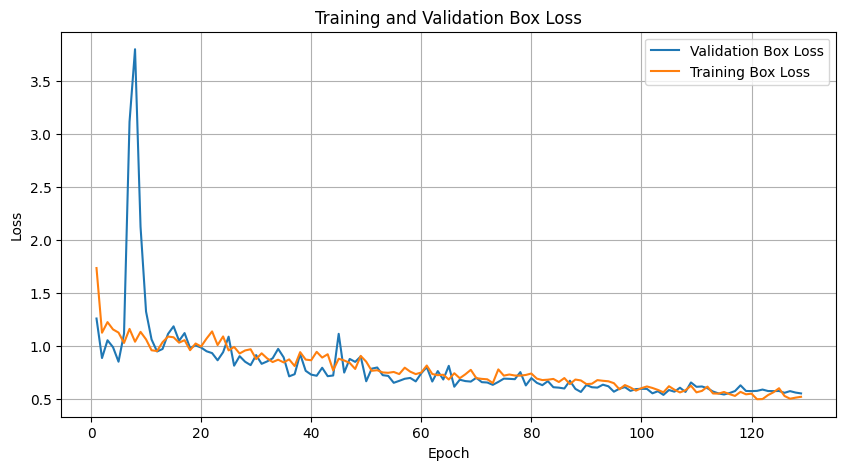

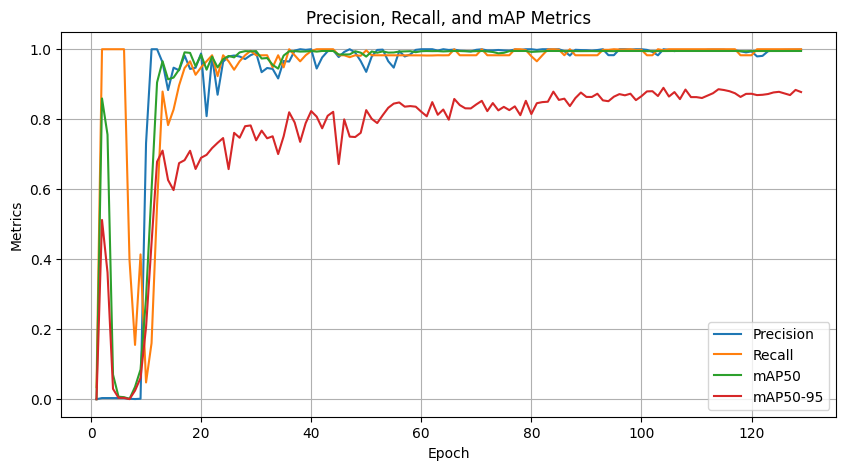

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

# Asegurarse de que las gráficas se muestren en el notebook
%matplotlib inline

# Leer el archivo CSV de resultados
results_csv_path = './runs/detect/train32/results.csv'
results_df = pd.read_csv(results_csv_path)

# Mostrar las primeras filas del DataFrame y las columnas disponibles
print(results_df.head())
print("Columnas disponibles:", results_df.columns)

# Verificar si las columnas necesarias existen
required_columns = ['epoch', 'val/box_loss', 'train/box_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
for col in required_columns:
    if col not in results_df.columns:
        print(f"Error: La columna {col} no existe en el DataFrame.")
        exit()

# Graficar las métricas de entrenamiento y validación
plt.figure(figsize=(10, 5))
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Validation Box Loss')
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Training Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Box Loss')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision')
plt.plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall')
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP50')
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP50-95')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.title('Precision, Recall, and mAP Metrics')
plt.grid(True)
plt.show()